In [1]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import torch
import scipy.stats as stats
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib
from sklearn.linear_model import LogisticRegression
plt.style.use('default.mplstyle')

In [2]:
with open("Fig1.pkl", "rb") as f:
    projected = pickle.load(f)

In [3]:
categories = {
    'Joy': ['lovely', 'enjoyable', 'amazing', 'delighted'],
    'Sad': ['horrible', 'disappointing', 'unhappy', 'lonely'],
    'Be': ['am', 'is', 'are', 'was', 'were'],
}

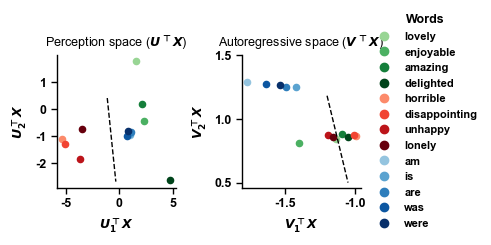

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(5.0, 2.3))
legend_handles = []

def plot_decision_boundary(ax, X, y, xmin, xmax, **plot_kwargs):
    """
    Fit a linear classifier on (X,y) and plot its decision boundary on ax.
    """
    clf = LogisticRegression().fit(X, y)
    w, b = clf.coef_[0], clf.intercept_[0]
    xs = np.array([xmin, xmax])
    ys = -(w[0] * xs + b) / w[1]
    ax.plot(xs, ys, **plot_kwargs)

# First: plot U-space
ax = axes[0]
for cat in categories:
    word_list = categories[cat]
    n = len(word_list)
    cmap = {'Joy': plt.cm.Greens, 'Sad': plt.cm.Reds}.get(cat, plt.cm.Blues)
    colors = cmap(np.linspace(0.40, 1.0, n))
    for i_word, word in enumerate(word_list):
        pts = projected['U'][cat][i_word]
        ax.scatter(pts[:, 0], pts[:, 1],
                   facecolor=colors[i_word], edgecolor=colors[i_word], s=20)
ax.set_xlabel(r'$U_1^\top X$')
ax.set_ylabel(r'$U_2^\top X$')
ax.set_title('Perception space ($U^\\top X$)')

# Build training data for U-space boundary
joy_u = np.vstack(projected['U']['Joy'])
sad_u = np.vstack(projected['U']['Sad'])
X_u = np.vstack([joy_u, sad_u])
y_u = np.hstack([np.ones(len(joy_u)), np.zeros(len(sad_u))])
plot_decision_boundary(ax, X_u, y_u, xmin=-1.1, xmax=-0.3, color='black', linestyle='--', linewidth=1)

# Next: plot V-space
ax = axes[1]
legend_handles = []
for cat in categories:
    word_list = categories[cat]
    n = len(word_list)
    cmap = {'Joy': plt.cm.Greens, 'Sad': plt.cm.Reds}.get(cat, plt.cm.Blues)
    colors = cmap(np.linspace(0.40, 1.0, n))
    for i_word, word in enumerate(word_list):
        pts = projected['V'][cat][i_word] * 10.0 # just to match the scale
        ax.scatter(pts[:, 0], pts[:, 1],
                   facecolor=colors[i_word], edgecolor=colors[i_word], s=20)
        # proxy for legend
        handle = Line2D([0], [0], marker='o', linestyle='',
                        markerfacecolor=colors[i_word],
                        markeredgecolor=colors[i_word], markersize=6)
        legend_handles.append((handle, word))

ax.set_xlabel(r'$V_1^\top X$')
ax.set_ylabel(r'$V_2^\top X$')
ax.set_title('Autoregressive space ($V^\\top X$)')
handles, labels = zip(*legend_handles)
ax.legend(handles, labels,
          loc='center left', bbox_to_anchor=(1.02, 0.5),
          title='Words', fontsize=8, title_fontsize=9)

# Build training data for V-space boundary
joy_v = np.vstack(projected['V']['Joy']) * 10.0 # just to match the scale
sad_v = np.vstack(projected['V']['Sad']) * 10.0 # just to match the scale   
X_v = np.vstack([joy_v, sad_v])
y_v = np.hstack([np.ones(len(joy_v)), np.zeros(len(sad_v))])
plot_decision_boundary(axes[1], X_v, y_v, xmin=-1.20, xmax=-1.05, color='black', linestyle='--', linewidth=1)
ax.set_yticks([0.5, 1.0, 1.5])
plt.tight_layout()
plt.show()